In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import plotly.express as px 
from scipy.fftpack import fft 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import seaborn as sns

from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model



In [2]:
Normal_DP=pd.read_csv("Normal_DP.csv")

In [3]:
Normal_DP=Normal_DP.drop(columns=['Unnamed: 0'])
Normal_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,0.000293,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,0.021976,0.684039


In [4]:
Normal_DPx=Normal_DP
Normal_DP=Normal_DPx.drop(columns=['Time '])
Normal_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,0.593152,-0.090887,49.371344,0.021976,0.684039


In [5]:
#Normalizing the data
for col in Normal_DP:
    Normal_DP[col] = (Normal_DP[col]-Normal_DP[col].min())/(Normal_DP[col].max()-Normal_DP[col].min())

In [6]:
Cavitation_DP=pd.read_csv("Cavitation_DP.csv")
Cavitation_DP=Cavitation_DP.drop(columns=['Unnamed: 0'])
Cavitation_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.000098,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,0.018344,0.839782


In [7]:
Cavitation_DPx=Cavitation_DP
Cavitation_DP=Cavitation_DP.drop(columns=['Time '])
Cavitation_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,0.215623,-0.624159,27.789128,0.018344,0.839782


In [8]:
#Normalizing the data
for col in Cavitation_DP:
    Cavitation_DP[col] = (Cavitation_DP[col]-Cavitation_DP[col].min())/(Cavitation_DP[col].max()-Cavitation_DP[col].min())

In [9]:
scaler = StandardScaler()

scaler.fit(Normal_DP)
Normal_DP = scaler.transform(Normal_DP)

scaler.fit(Cavitation_DP)
Cavitation_DP = scaler.transform(Cavitation_DP)


In [10]:
df=Normal_DP
Cavdf=Cavitation_DP


In [11]:
df = pd.DataFrame(df, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])


In [12]:
X_Norm = fft(df)
N = len(df)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

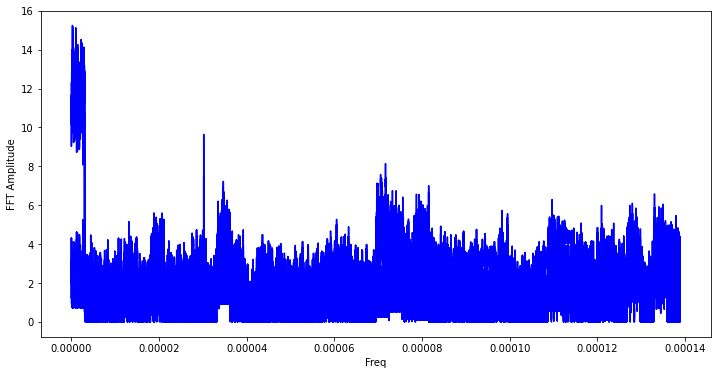

In [13]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_Norm[:n_oneside]), 'b')
plt.xlabel('Freq')
plt.ylabel('FFT Amplitude')
plt.show()

In [14]:
X_cav = fft(Cavdf)
N = len(Cavdf)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

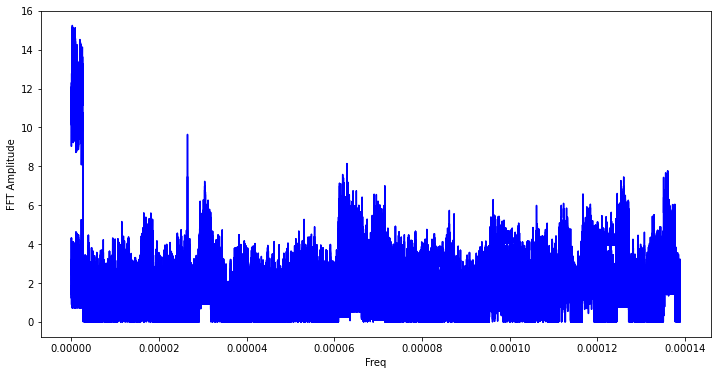

In [15]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_Norm[:n_oneside]), 'b')
plt.xlabel('Freq')
plt.ylabel('FFT Amplitude')
plt.show()

In [16]:
X_Norm = X_Norm.real.astype(np.float32)
X_cav = X_cav.real.astype(np.float32)

In [17]:
X_Norm = pd.DataFrame(X_Norm, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])
X_cav = pd.DataFrame(X_cav, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])

In [18]:
X_Norm['Time ']=Normal_DPx['Time ']
X_Norm

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,10.949224,9.380308,-0.025825,-0.025825,9.380308,0.000000
1,10.869041,9.445177,-0.050602,-0.050602,9.445177,0.000098
2,10.893730,9.425203,-0.042973,-0.042973,9.425203,0.000195
3,10.478212,9.761365,-0.171375,-0.171375,9.761365,0.000293
4,10.967740,9.365328,-0.020103,-0.020103,9.365328,0.000391
...,...,...,...,...,...,...
919995,-1.114366,1.159629,0.496483,0.496483,1.159629,89.843262
919996,-0.651565,0.785215,0.639496,0.639496,0.785215,89.843359
919997,-1.122577,1.166271,0.493945,0.493945,1.166271,89.843457
919998,-0.906607,0.991548,0.560684,0.560684,0.991548,89.843555


In [19]:
X_cav['Time ']=Cavitation_DPx['Time ']
X_cav

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,2.654498,-2.256242,-0.665647,-0.665647,-2.256242,0.000000
1,6.477165,0.816141,-0.389844,-0.389844,0.816141,0.000098
2,6.314395,0.947824,-0.440142,-0.440142,0.947824,0.000195
3,6.760710,0.586748,-0.302223,-0.302223,0.586748,0.000293
4,5.886511,1.293990,-0.572366,-0.572366,1.293990,0.000391
...,...,...,...,...,...,...
1048571,1.181810,-1.119986,0.218008,0.218008,-1.119986,102.399512
1048572,0.462503,-0.538054,-0.004271,-0.004271,-0.538054,102.399609
1048573,0.730292,-0.754700,0.078481,0.078481,-0.754700,102.399707
1048574,1.110978,-1.062682,0.196119,0.196119,-1.062682,102.399805


In [20]:
X_train=X_Norm

In [21]:
X_train=X_train.drop(columns=['Time '])
X_train

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,10.949224,9.380308,-0.025825,-0.025825,9.380308
1,10.869041,9.445177,-0.050602,-0.050602,9.445177
2,10.893730,9.425203,-0.042973,-0.042973,9.425203
3,10.478212,9.761365,-0.171375,-0.171375,9.761365
4,10.967740,9.365328,-0.020103,-0.020103,9.365328
...,...,...,...,...,...
919995,-1.114366,1.159629,0.496483,0.496483,1.159629
919996,-0.651565,0.785215,0.639496,0.639496,0.785215
919997,-1.122577,1.166271,0.493945,0.493945,1.166271
919998,-0.906607,0.991548,0.560684,0.560684,0.991548


In [22]:
X_train=np.array(X_train)


In [23]:
timesteps=X_train.shape[0]
features=X_train.shape[1]


In [24]:
X_train.shape=(timesteps,features,1)
X_train.shape

(920000, 5, 1)

In [25]:
#Starting the LSTM model
model = keras.Sequential()

model.add(layers.Bidirectional(LSTM(25, activation='relu', return_sequences=True)))
model.add(layers.BatchNormalization())

model.add(layers.Bidirectional(LSTM(5, activation='relu', return_sequences=False)))
model.add(layers.BatchNormalization())

model.add(layers.RepeatVector(features))

model.add(layers.Bidirectional(LSTM(5, activation='relu', return_sequences=True)))
model.add(layers.BatchNormalization())

model.add((layers.Bidirectional(LSTM(25, activation='relu', return_sequences=True))))
model.add(layers.BatchNormalization())
         
model.add(layers.TimeDistributed(Dense(X_train.shape[2])))

model.compile(optimizer='adam', loss='mae')



In [26]:
X_test=X_cav

In [27]:
X_test=X_test.drop(columns=['Time '])
X_test

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,2.654498,-2.256242,-0.665647,-0.665647,-2.256242
1,6.477165,0.816141,-0.389844,-0.389844,0.816141
2,6.314395,0.947824,-0.440142,-0.440142,0.947824
3,6.760710,0.586748,-0.302223,-0.302223,0.586748
4,5.886511,1.293990,-0.572366,-0.572366,1.293990
...,...,...,...,...,...
1048571,1.181810,-1.119986,0.218008,0.218008,-1.119986
1048572,0.462503,-0.538054,-0.004271,-0.004271,-0.538054
1048573,0.730292,-0.754700,0.078481,0.078481,-0.754700
1048574,1.110978,-1.062682,0.196119,0.196119,-1.062682


In [28]:
 model.fit(X_train, X_train, epochs=150, batch_size=512, validation_data=(X_test, X_test))

Epoch 1/150
1797/1797 [==============================] - 64s 30ms/step - loss: 0.1881 - val_loss: 0.1776
Epoch 2/150
1797/1797 [==============================] - 51s 28ms/step - loss: 0.0841 - val_loss: 0.1280
Epoch 3/150
1797/1797 [==============================] - 49s 27ms/step - loss: 0.0789 - val_loss: 0.1270
Epoch 4/150
1797/1797 [==============================] - 51s 28ms/step - loss: 0.0746 - val_loss: 0.1084
Epoch 5/150
1797/1797 [==============================] - 51s 28ms/step - loss: 0.0704 - val_loss: 0.1043
Epoch 6/150
1797/1797 [==============================] - 49s 27ms/step - loss: 0.0678 - val_loss: 0.0977
Epoch 7/150
1797/1797 [==============================] - 52s 29ms/step - loss: 0.0651 - val_loss: 0.0943
Epoch 8/150
1797/1797 [==============================] - 51s 28ms/step - loss: 0.0640 - val_loss: 0.0963
Epoch 9/150
1797/1797 [==============================] - 48s 27ms/step - loss: 0.0612 - val_loss: 0.0857
Epoch 10/150
1797/1797 [==============================]

In [29]:
X_pred = model.predict(X_train, verbose=1)

28750/28750 [==============================] - 90s 3ms/step


C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 3.5)

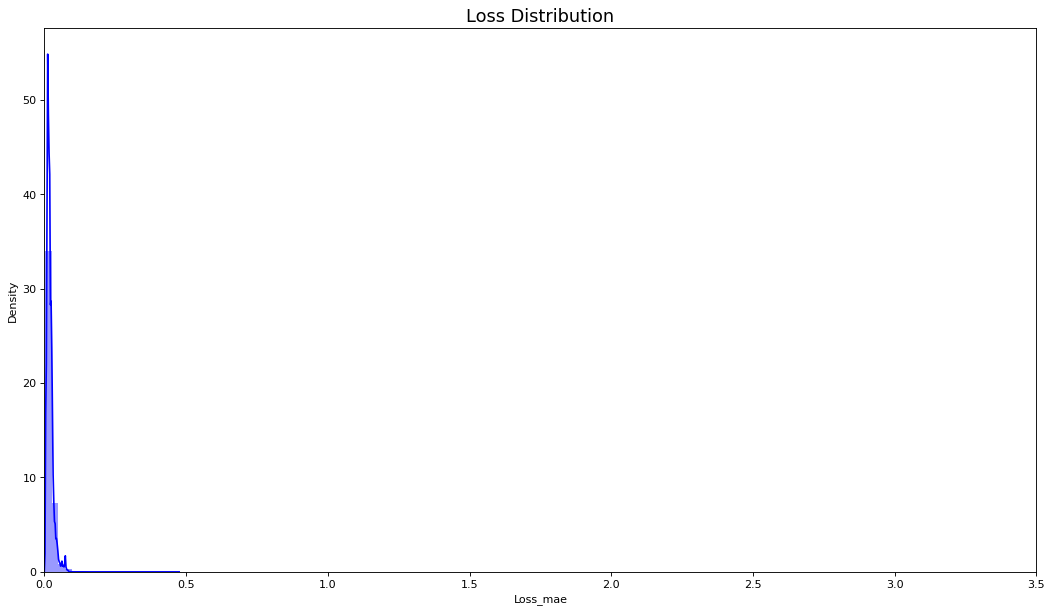

In [30]:
scored = pd.DataFrame(index=X_Norm.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,3.5])

In [31]:
X_pred = model.predict(X_test, verbose=1)

32768/32768 [==============================] - 111s 3ms/step


In [32]:
X_test=np.array(X_test)
X_test.shape=(1048576, features,1)
X_test.shape

(1048576, 5, 1)

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 2.0)

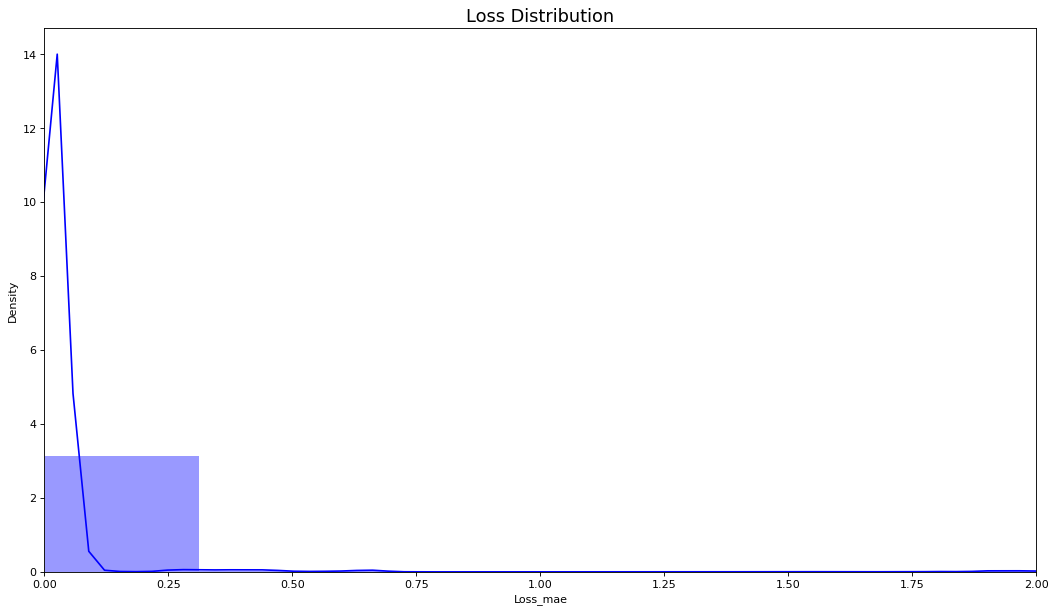

In [33]:
scored = pd.DataFrame(index=X_cav.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,2])

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.5)

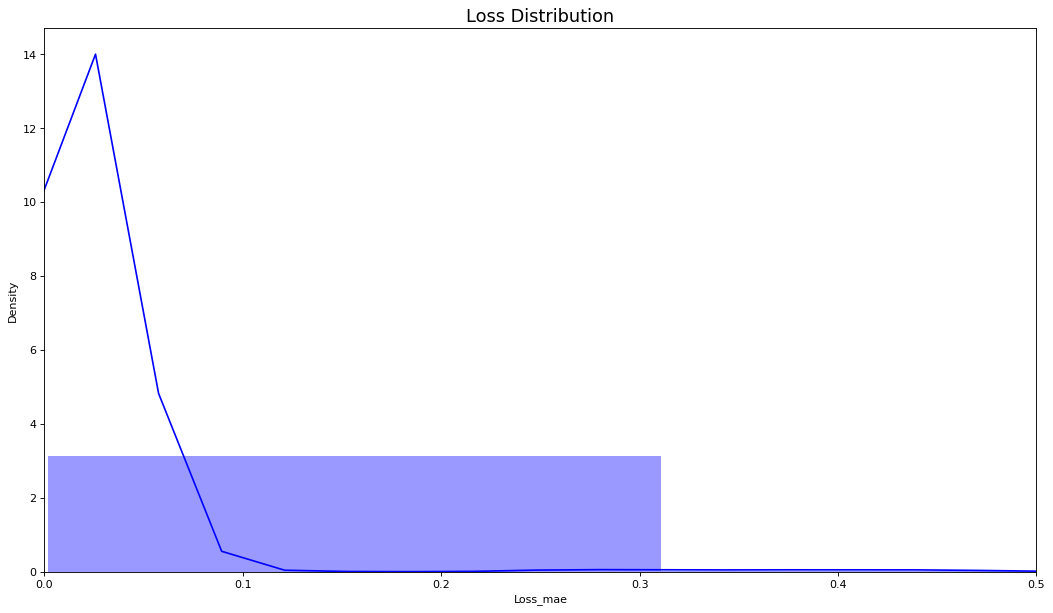

In [34]:
scored = pd.DataFrame(index=X_cav.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,0.5])

In [35]:
# calculate the loss on the test set
test_mae_loss = np.mean(np.abs(X_pred-X_test), axis = 1)
threshold=0.13

In [36]:
test_score_df = X_cav
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']


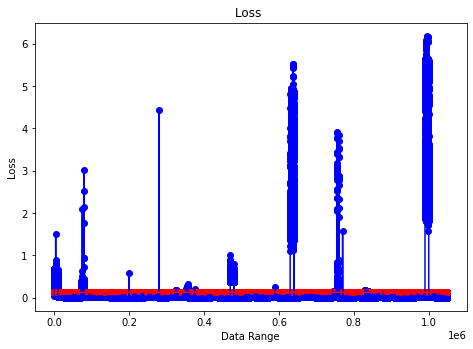

In [37]:
fig=plt.figure()
plt.rcParams["figure.figsize"] = (12,12)
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=test_score_df.index, y=test_score_df['loss'],color='b')
ax.scatter(x=test_score_df.index, y=test_score_df['threshold'], color='r')
ax.plot(test_score_df.index, test_score_df['loss'], color='b')
ax.plot(test_score_df.index, test_score_df['threshold'], color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Loss')
ax.set_title('Loss ')
plt.show()

In [38]:
test_score_df

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time,loss,threshold,anomaly
0,2.654498,-2.256242,-0.665647,-0.665647,-2.256242,0.000000,0.038756,0.13,False
1,6.477165,0.816141,-0.389844,-0.389844,0.816141,0.000098,0.352868,0.13,True
2,6.314395,0.947824,-0.440142,-0.440142,0.947824,0.000195,0.338530,0.13,True
3,6.760710,0.586748,-0.302223,-0.302223,0.586748,0.000293,0.399852,0.13,True
4,5.886511,1.293990,-0.572366,-0.572366,1.293990,0.000391,0.312802,0.13,True
...,...,...,...,...,...,...,...,...,...
1048571,1.181810,-1.119986,0.218008,0.218008,-1.119986,102.399512,0.011199,0.13,False
1048572,0.462503,-0.538054,-0.004271,-0.004271,-0.538054,102.399609,0.008552,0.13,False
1048573,0.730292,-0.754700,0.078481,0.078481,-0.754700,102.399707,0.009453,0.13,False
1048574,1.110978,-1.062682,0.196119,0.196119,-1.062682,102.399805,0.011473,0.13,False


In [39]:
test_score_df["anomaly"][1]

True

In [40]:
anomalies=test_score_df


In [41]:
anomalies=anomalies.drop(anomalies.index[anomalies["anomaly"] ==False])
anomalies

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time,loss,threshold,anomaly
1,6.477165,0.816141,-0.389844,-0.389844,0.816141,0.000098,0.352868,0.13,True
2,6.314395,0.947824,-0.440142,-0.440142,0.947824,0.000195,0.338530,0.13,True
3,6.760710,0.586748,-0.302223,-0.302223,0.586748,0.000293,0.399852,0.13,True
4,5.886511,1.293990,-0.572366,-0.572366,1.293990,0.000391,0.312802,0.13,True
5,6.584858,0.729015,-0.356564,-0.356564,0.729015,0.000488,0.369092,0.13,True
...,...,...,...,...,...,...,...,...,...
999997,-10.823654,-6.972813,0.020556,0.020556,-6.972813,97.655957,2.921049,0.13,True
999998,-10.311711,-7.386984,0.178755,0.178755,-7.386984,97.656055,2.290715,0.13,True
999999,-10.253962,-7.433704,0.196601,0.196601,-7.433704,97.656152,2.424295,0.13,True
1014731,2.890646,-4.481061,2.568149,2.568149,-4.481061,99.094824,0.131570,0.13,True


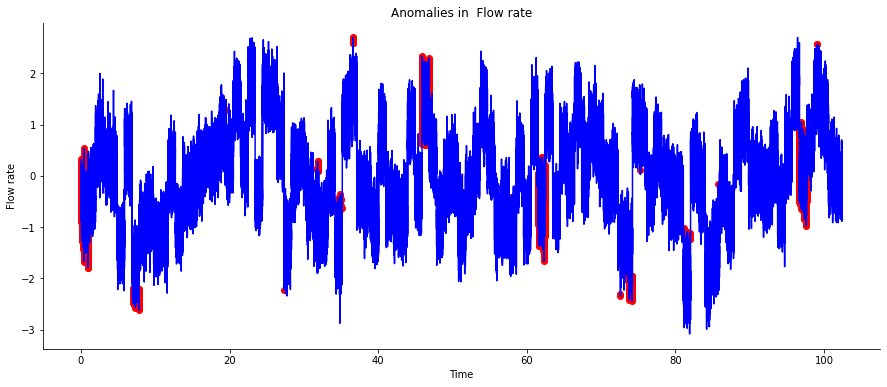

In [42]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['Q  L/M'], color='blue')
ax.scatter(anomalies['Time '], anomalies['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in  Flow rate")
plt.xlabel("Time")
plt.ylabel("Flow rate")

plt.show()

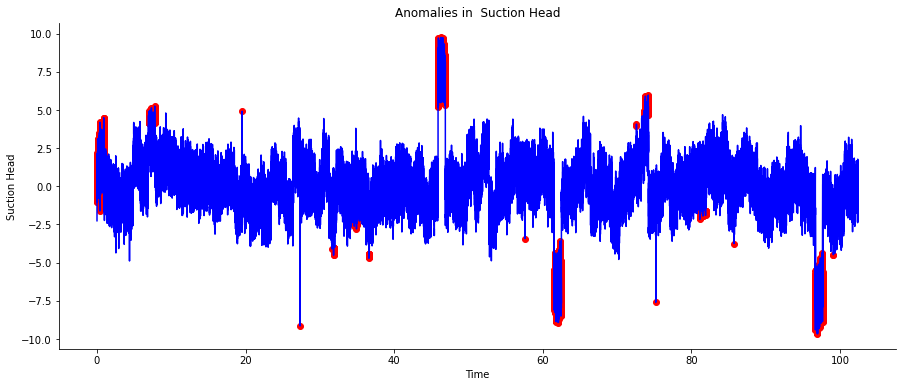

In [43]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['H'], color='blue')
ax.scatter(anomalies['Time '], anomalies['H'], color='red')
sb.despine()
plt.title("Anomalies in  Suction Head")
plt.xlabel("Time")
plt.ylabel("Suction Head")

plt.show()

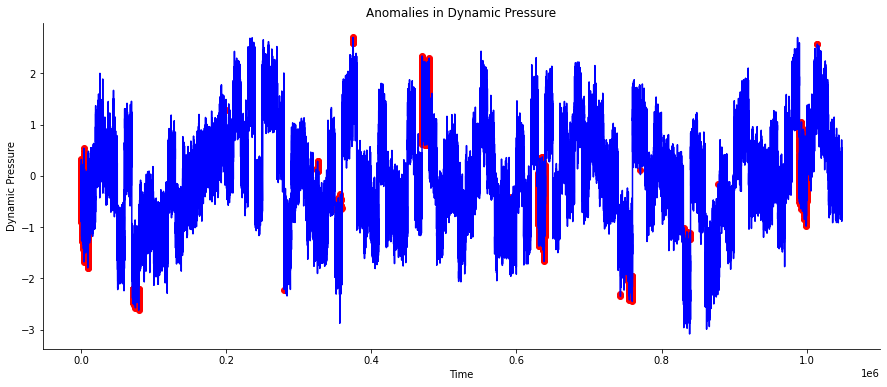

In [44]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df.index, test_score_df['Dynamic Pressure'], color='blue')
ax.scatter(anomalies.index, anomalies['Dynamic Pressure'], color='red')
sb.despine()
plt.title("Anomalies in Dynamic Pressure")
plt.xlabel("Time")
plt.ylabel("Dynamic Pressure")
plt.show()

In [45]:
model.save("Bi_LSTM01_DP_frequency")


INFO:tensorflow:Assets written to: Bi_LSTM01_DP_frequency\assets


# Vibration


In [2]:
Normal_Vib=pd.read_csv("Normal_Vib.csv")

In [3]:
Normal_Vib=Normal_Vib.drop(columns=['Unnamed: 0'])
Normal_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,0.000293,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [4]:
Normal_Vibx=Normal_Vib
Normal_Vib=Normal_Vibx.drop(columns=['Time '])
Normal_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [5]:
#Normalizing the data
for col in Normal_Vib:
    Normal_Vib[col] = (Normal_Vib[col]-Normal_Vib[col].min())/(Normal_Vib[col].max()-Normal_Vib[col].min())

In [6]:
Cavitation_Vib=pd.read_csv("Cavitation_Vib.csv")
Cavitation_Vib=Cavitation_Vib.drop(columns=['Unnamed: 0'])
Cavitation_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.000098,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [7]:
Cavitation_Vibx=Cavitation_Vib
Cavitation_Vib=Cavitation_Vib.drop(columns=['Time '])
Cavitation_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [8]:
#Normalizing the data
for col in Cavitation_Vib:
    Cavitation_Vib[col] = (Cavitation_Vib[col]-Cavitation_Vib[col].min())/(Cavitation_Vib[col].max()-Cavitation_Vib[col].min())

In [9]:
scaler = StandardScaler()

scaler.fit(Normal_Vib)
Normal_Vib = scaler.transform(Normal_Vib)

scaler.fit(Cavitation_Vib)
Cavitation_Vib = scaler.transform(Cavitation_Vib)


In [10]:
df=Normal_Vib
Cavdf=Cavitation_Vib


In [11]:
df = pd.DataFrame(df, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])


In [12]:
X_Norm = fft(df)
N = len(df)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

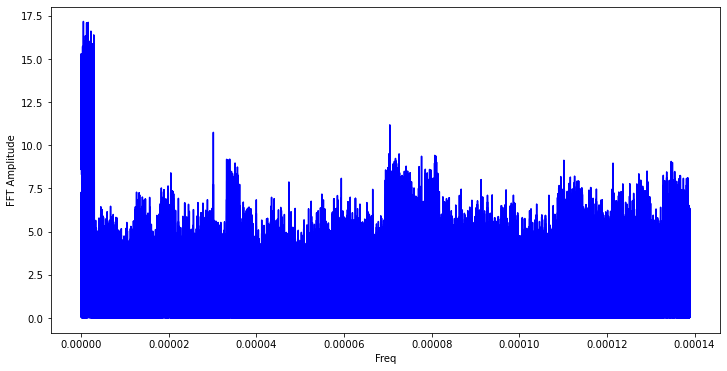

In [13]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_Norm[:n_oneside]), 'b')
plt.xlabel('Freq')
plt.ylabel('FFT Amplitude')
plt.show()

In [14]:
X_cav = fft(Cavdf)
N = len(Cavdf)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

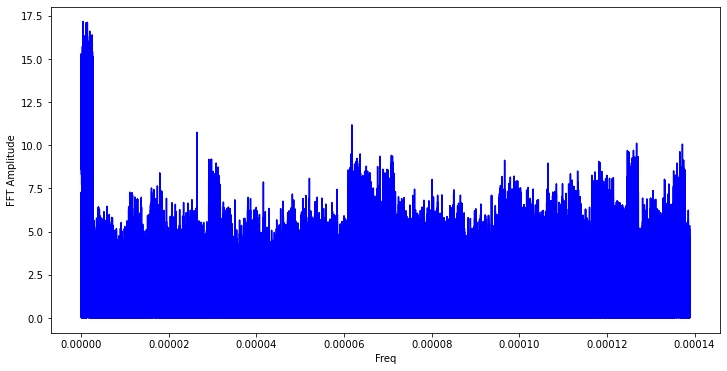

In [15]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_Norm[:n_oneside]), 'b')
plt.xlabel('Freq')
plt.ylabel('FFT Amplitude')
plt.show()

In [16]:
X_Norm = X_Norm.real.astype(np.float32)
X_cav = X_cav.real.astype(np.float32)

In [17]:
X_Norm = pd.DataFrame(X_Norm, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])
X_cav = pd.DataFrame(X_cav, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])


In [18]:
X_Norm['Time ']=Normal_Vibx['Time ']
X_Norm

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time
0,12.398434,9.071866,3.723394,-2.399124,3.723394,9.071866,0.000000
1,12.142680,9.773993,2.128517,-0.357873,2.128517,9.773993,0.000098
2,12.142035,9.807361,2.029707,-0.226340,2.029707,9.807361,0.000195
3,12.945234,8.713410,3.705159,-2.192544,3.705159,8.713410,0.000293
4,9.474541,11.131047,3.393636,-2.934078,3.393636,11.131047,0.000391
...,...,...,...,...,...,...,...
919995,-4.213120,2.982512,0.674927,-0.464332,0.674927,2.982512,89.843262
919996,-0.254025,-0.074837,1.928787,-0.816447,1.928787,-0.074837,89.843359
919997,-1.918158,1.252768,1.274237,-0.498425,1.274237,1.252768,89.843457
919998,-0.940173,1.115567,-0.270130,1.886726,-0.270130,1.115567,89.843555


In [19]:
X_cav['Time ']=Cavitation_Vibx['Time ']
X_cav

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time
0,1.778136,-1.118543,-1.223256,-0.921674,-1.223256,-1.118543,0.000000
1,4.734303,2.973048,-0.457219,-0.970248,-0.457219,2.973048,0.000098
2,6.387003,1.806649,-0.263424,-0.677741,-0.263424,1.806649,0.000195
3,6.385583,1.673558,0.138688,-1.214364,0.138688,1.673558,0.000293
4,5.022058,2.422576,0.618687,-2.308871,0.618687,2.422576,0.000391
...,...,...,...,...,...,...,...
1048571,-0.435910,0.404058,-0.922678,0.726574,-0.922678,0.404058,102.399512
1048572,0.501458,-0.320350,-0.624189,0.641045,-0.624189,-0.320350,102.399609
1048573,1.084794,-0.790656,-0.379945,0.509830,-0.379945,-0.790656,102.399707
1048574,-0.526195,0.596610,-1.319763,1.225925,-1.319763,0.596610,102.399805


In [20]:
X_train=X_Norm

In [21]:
X_train=X_train.drop(columns=['Time '])
X_train

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,12.398434,9.071866,3.723394,-2.399124,3.723394,9.071866
1,12.142680,9.773993,2.128517,-0.357873,2.128517,9.773993
2,12.142035,9.807361,2.029707,-0.226340,2.029707,9.807361
3,12.945234,8.713410,3.705159,-2.192544,3.705159,8.713410
4,9.474541,11.131047,3.393636,-2.934078,3.393636,11.131047
...,...,...,...,...,...,...
919995,-4.213120,2.982512,0.674927,-0.464332,0.674927,2.982512
919996,-0.254025,-0.074837,1.928787,-0.816447,1.928787,-0.074837
919997,-1.918158,1.252768,1.274237,-0.498425,1.274237,1.252768
919998,-0.940173,1.115567,-0.270130,1.886726,-0.270130,1.115567


In [22]:
X_train=np.array(X_train)


In [23]:
timesteps=X_train.shape[0]
features=X_train.shape[1]


In [24]:
X_train.shape=(timesteps,features,1)
X_train.shape

(920000, 6, 1)

In [25]:
#Starting the LSTM model
model = keras.Sequential()

model.add(layers.Bidirectional(LSTM(36, activation='relu', return_sequences=True)))
model.add(layers.BatchNormalization())

model.add(layers.Bidirectional(LSTM(6, activation='relu', return_sequences=False)))
model.add(layers.BatchNormalization())

model.add(layers.RepeatVector(features))

model.add(layers.Bidirectional(LSTM(6, activation='relu', return_sequences=True)))
model.add(layers.BatchNormalization())

model.add((layers.Bidirectional(LSTM(36, activation='relu', return_sequences=True))))
model.add(layers.BatchNormalization())
         
model.add(layers.TimeDistributed(Dense(X_train.shape[2])))

model.compile(optimizer='adam', loss='mae')



In [26]:
X_test=X_cav

In [27]:
X_test=X_test.drop(columns=['Time '])
X_test

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,1.778136,-1.118543,-1.223256,-0.921674,-1.223256,-1.118543
1,4.734303,2.973048,-0.457219,-0.970248,-0.457219,2.973048
2,6.387003,1.806649,-0.263424,-0.677741,-0.263424,1.806649
3,6.385583,1.673558,0.138688,-1.214364,0.138688,1.673558
4,5.022058,2.422576,0.618687,-2.308871,0.618687,2.422576
...,...,...,...,...,...,...
1048571,-0.435910,0.404058,-0.922678,0.726574,-0.922678,0.404058
1048572,0.501458,-0.320350,-0.624189,0.641045,-0.624189,-0.320350
1048573,1.084794,-0.790656,-0.379945,0.509830,-0.379945,-0.790656
1048574,-0.526195,0.596610,-1.319763,1.225925,-1.319763,0.596610


In [28]:
 model.fit(X_train, X_train, epochs=150, batch_size=512, validation_data=(X_test, X_test))

Epoch 1/150
1797/1797 [==============================] - 79s 38ms/step - loss: 0.3709 - val_loss: 0.1599
Epoch 2/150
1797/1797 [==============================] - 67s 37ms/step - loss: 0.1119 - val_loss: 0.1053
Epoch 3/150
1797/1797 [==============================] - 65s 36ms/step - loss: 0.1027 - val_loss: 0.1001
Epoch 4/150
1797/1797 [==============================] - 65s 36ms/step - loss: 0.0955 - val_loss: 0.1179
Epoch 5/150
1797/1797 [==============================] - 68s 38ms/step - loss: 0.0916 - val_loss: 0.1084
Epoch 6/150
1797/1797 [==============================] - 64s 36ms/step - loss: 0.0886 - val_loss: 0.1015
Epoch 7/150
1797/1797 [==============================] - 67s 37ms/step - loss: 0.0848 - val_loss: 0.1062
Epoch 8/150
1797/1797 [==============================] - 64s 36ms/step - loss: 0.0829 - val_loss: 0.0948
Epoch 9/150
1797/1797 [==============================] - 66s 37ms/step - loss: 0.0806 - val_loss: 0.1050
Epoch 10/150
1797/1797 [==============================]

1797/1797 [==============================] - 71s 40ms/step - loss: 0.0487 - val_loss: 0.0538
Epoch 79/150
1797/1797 [==============================] - 77s 43ms/step - loss: 0.0473 - val_loss: 0.0592
Epoch 80/150
1797/1797 [==============================] - 79s 44ms/step - loss: 0.0480 - val_loss: 0.0501
Epoch 81/150
1797/1797 [==============================] - 80s 45ms/step - loss: 0.0474 - val_loss: 0.0680
Epoch 82/150
1797/1797 [==============================] - 77s 43ms/step - loss: 0.0477 - val_loss: 0.1105
Epoch 83/150
1797/1797 [==============================] - 79s 44ms/step - loss: 0.0478 - val_loss: 0.0591
Epoch 84/150
1797/1797 [==============================] - 74s 41ms/step - loss: 0.0479 - val_loss: 0.0920
Epoch 85/150
1797/1797 [==============================] - 78s 43ms/step - loss: 0.0482 - val_loss: 0.0628
Epoch 86/150
1797/1797 [==============================] - 73s 41ms/step - loss: 0.0476 - val_loss: 0.0701
Epoch 87/150
1797/1797 [==============================] - 7

In [29]:
X_pred = model.predict(X_train, verbose=1)

28750/28750 [==============================] - 103s 4ms/step


C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 3.5)

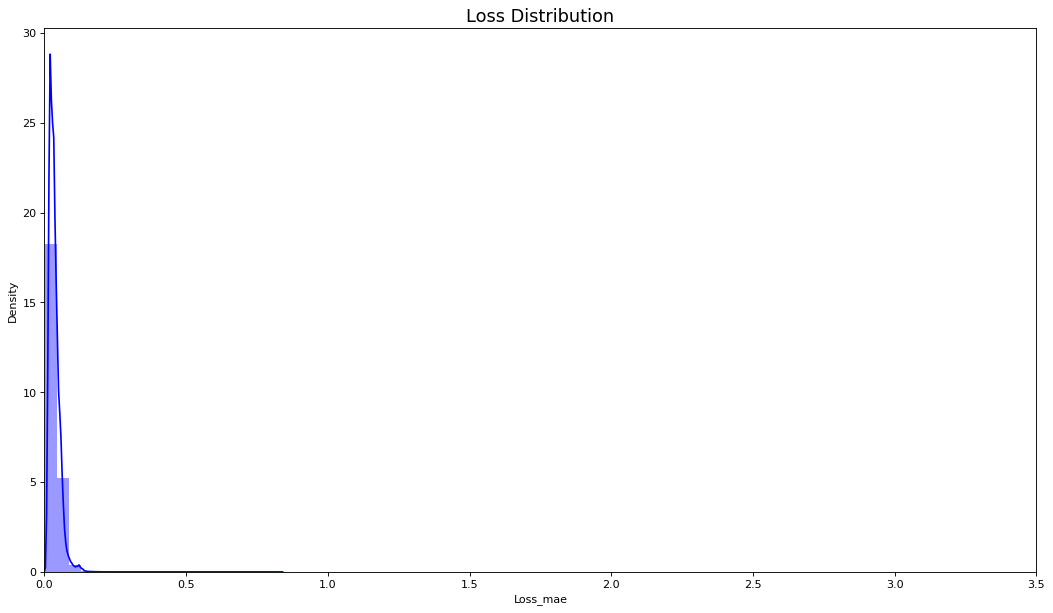

In [30]:
scored = pd.DataFrame(index=df.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,3.5])

In [31]:
X_pred = model.predict(X_test, verbose=1)

32768/32768 [==============================] - 126s 4ms/step


In [32]:
X_test=np.array(X_test)
X_test.shape=(1048576, features,1)
X_test.shape

(1048576, 6, 1)

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 5.0)

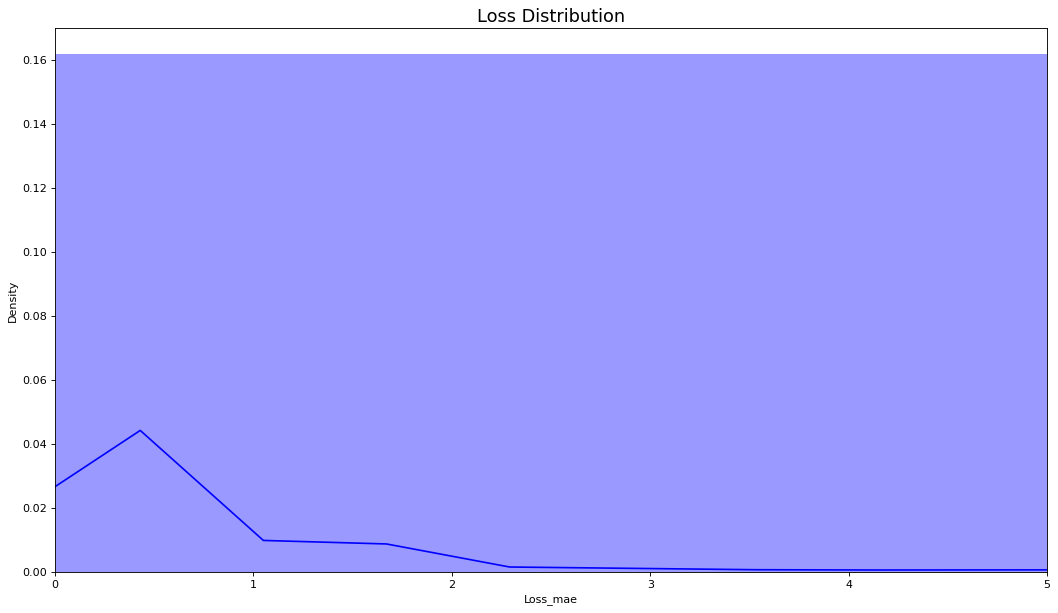

In [34]:
scored = pd.DataFrame(index=Cavdf.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,5])

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(2.0, 4.0)

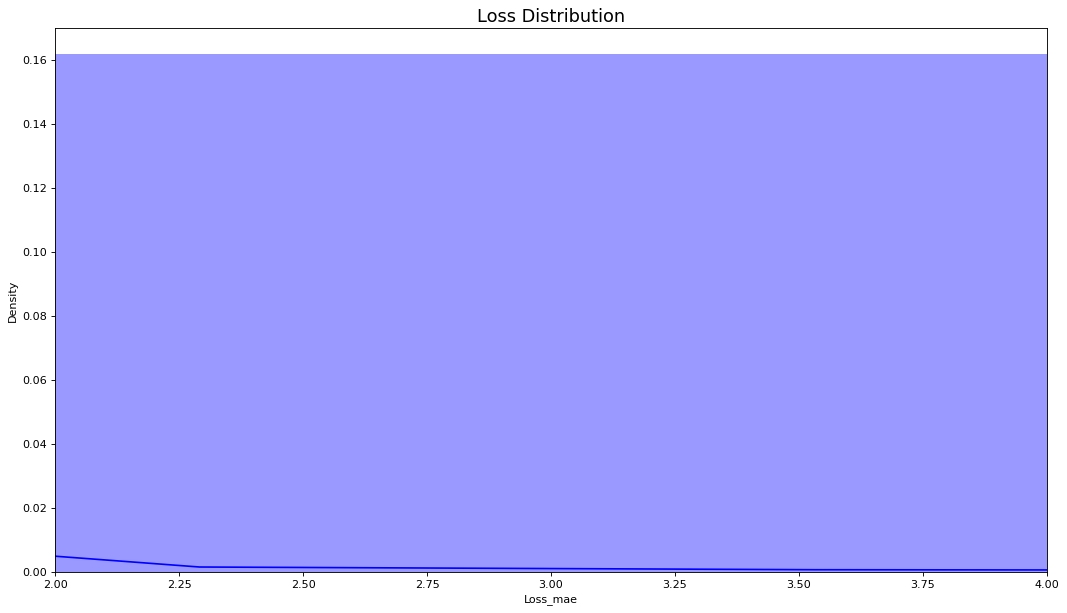

In [35]:
scored = pd.DataFrame(index=Cavdf.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([2.0,4.0])

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 10.0)

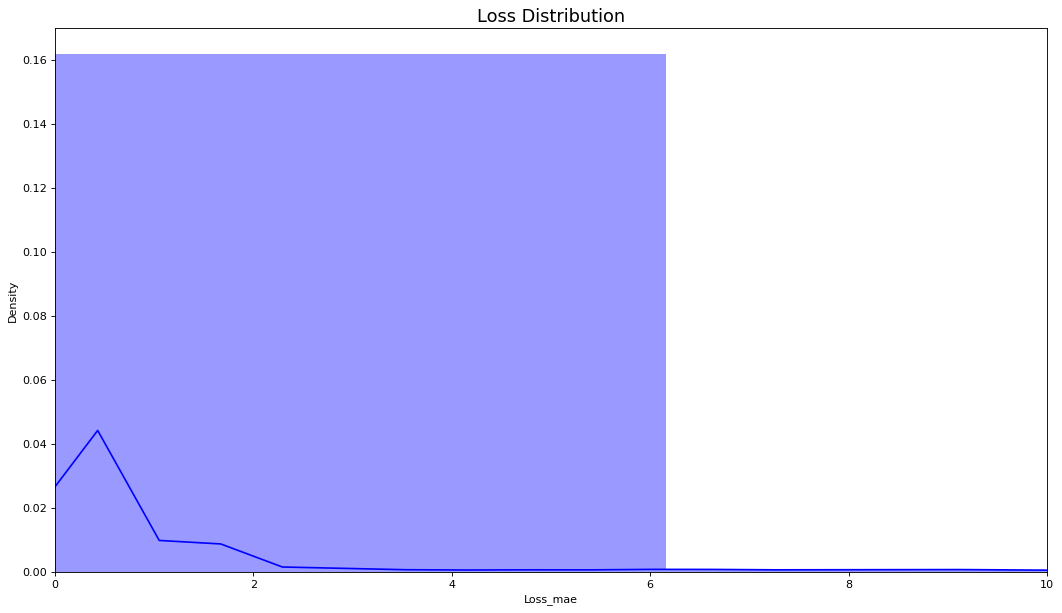

In [74]:
scored = pd.DataFrame(index=Cavdf.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,10.0])

In [60]:
# calculate the loss on the test set
test_mae_loss = np.mean(np.abs(X_pred-X_test), axis = 1)
threshold=2

In [61]:
test_mae_loss.shape

(1048576, 1)

In [62]:
test_score_df = X_cav
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']


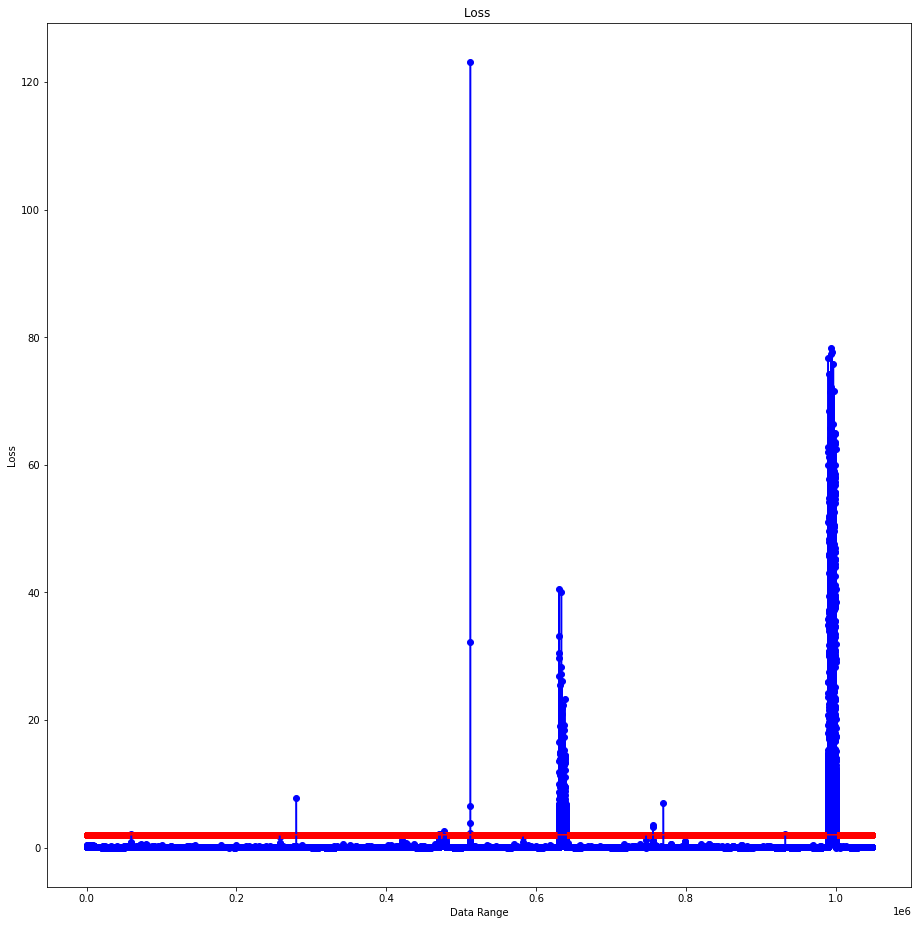

In [63]:
fig=plt.figure()
plt.rcParams["figure.figsize"] = (12,12)
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=test_score_df.index, y=test_score_df['loss'],color='b')
ax.scatter(x=test_score_df.index, y=test_score_df['threshold'], color='r')
ax.plot(test_score_df.index, test_score_df['loss'], color='b')
ax.plot(test_score_df.index, test_score_df['threshold'], color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Loss')
ax.set_title('Loss ')
plt.show()

In [64]:
test_score_df

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time,loss,threshold,anomaly
0,1.778136,-1.118543,-1.223256,-0.921674,-1.223256,-1.118543,0.000000,0.016805,2,False
1,4.734303,2.973048,-0.457219,-0.970248,-0.457219,2.973048,0.000098,0.112886,2,False
2,6.387003,1.806649,-0.263424,-0.677741,-0.263424,1.806649,0.000195,0.177749,2,False
3,6.385583,1.673558,0.138688,-1.214364,0.138688,1.673558,0.000293,0.144206,2,False
4,5.022058,2.422576,0.618687,-2.308871,0.618687,2.422576,0.000391,0.115897,2,False
...,...,...,...,...,...,...,...,...,...,...
1048571,-0.435910,0.404058,-0.922678,0.726574,-0.922678,0.404058,102.399512,0.011720,2,False
1048572,0.501458,-0.320350,-0.624189,0.641045,-0.624189,-0.320350,102.399609,0.011587,2,False
1048573,1.084794,-0.790656,-0.379945,0.509830,-0.379945,-0.790656,102.399707,0.017001,2,False
1048574,-0.526195,0.596610,-1.319763,1.225925,-1.319763,0.596610,102.399805,0.012758,2,False


In [65]:
test_score_df["anomaly"][1]

False

In [66]:
anomalies=test_score_df


In [67]:
anomalies=anomalies.drop(anomalies.index[anomalies["anomaly"] ==False])
anomalies

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time,loss,threshold,anomaly
59771,-1.106005,7.103721,-8.873266,8.406664,-8.873266,7.103721,5.837012,2.083355,2,True
280000,-15.600220,-8.053856,-5.647563,0.105374,-5.647563,-8.053856,27.343750,7.689428,2,True
470372,14.763987,8.898990,-0.898319,6.281367,-0.898319,8.898990,45.934766,2.083329,2,True
471737,17.281076,6.424122,1.492102,3.933168,1.492102,6.424122,46.068066,2.086838,2,True
476624,15.170609,8.609703,-0.843704,6.344087,-0.843704,8.609703,46.545312,2.633809,2,True
...,...,...,...,...,...,...,...,...,...,...
999992,-9.438643,-8.791456,-2.621765,2.591285,-2.621765,-8.791456,97.655469,9.724169,2,True
999993,-11.009069,-7.414956,-3.610418,3.386013,-3.610418,-7.414956,97.655566,8.291535,2,True
999994,-11.501306,-6.830324,-4.379841,4.247832,-4.379841,-6.830324,97.655664,3.696637,2,True
999995,-10.563621,-7.574162,-4.023697,4.085535,-4.023697,-7.574162,97.655762,10.618722,2,True


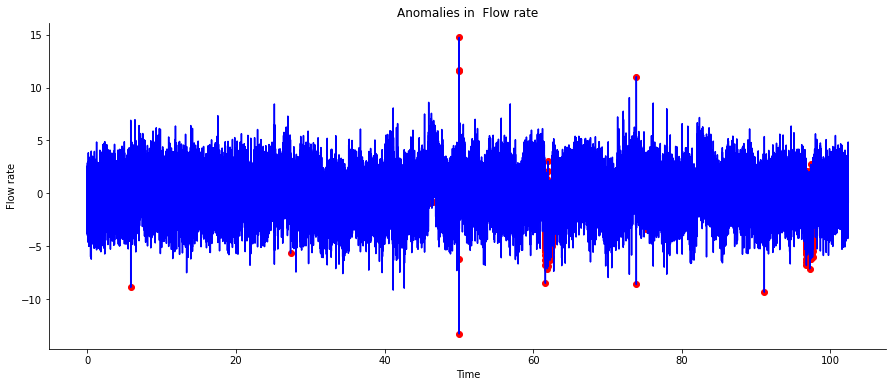

In [68]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['Q  L/M'], color='blue')
ax.scatter(anomalies['Time '], anomalies['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in  Flow rate")
plt.xlabel("Time")
plt.ylabel("Flow rate")

plt.show()

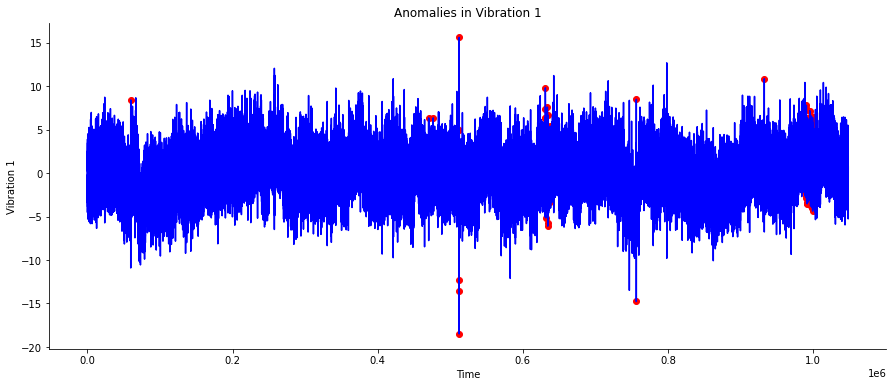

In [69]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df.index, test_score_df['Vibration 1'], color='blue')
ax.scatter(anomalies.index, anomalies['Vibration 1'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 1")
plt.xlabel("Time")
plt.ylabel("Vibration 1")
plt.show()

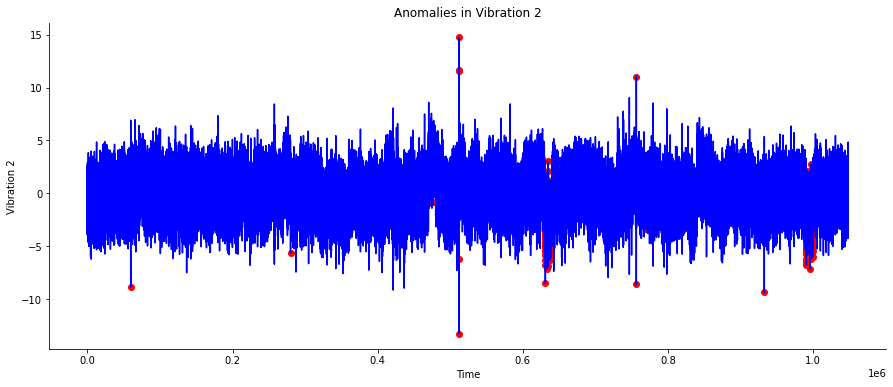

In [70]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df.index, test_score_df['Vibration 2'], color='blue')
ax.scatter(anomalies.index, anomalies['Vibration 2'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 2")
plt.xlabel("Time")
plt.ylabel("Vibration 2")
plt.show()

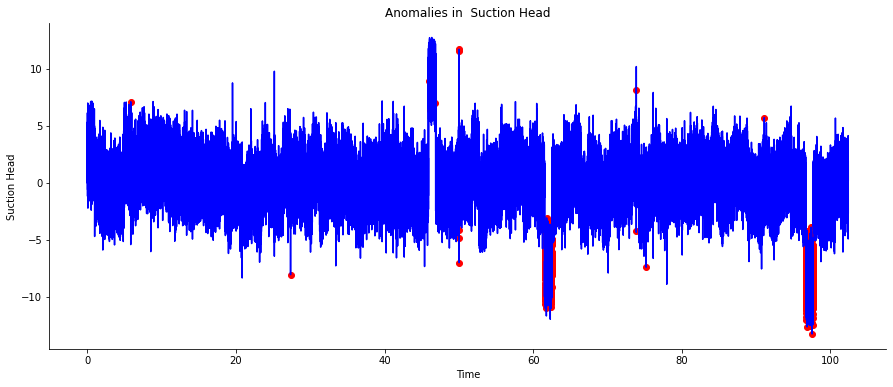

In [71]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['H'], color='blue')
ax.scatter(anomalies['Time '], anomalies['H'], color='red')
sb.despine()
plt.title("Anomalies in  Suction Head")
plt.xlabel("Time")
plt.ylabel("Suction Head")

plt.show()

In [72]:
model.save("Bi_LSTM01_Vib")


INFO:tensorflow:Assets written to: Bi_LSTM01_Vib\assets
